In [1]:
import matplotlib.pyplot as plt

from matplotlib.offsetbox import TextArea, AnnotationBbox, OffsetBox, HPacker, VPacker

In [2]:
def spacify(string, spaces=2):
    """Add spaces to the beginning of each line in a multi-line string."""
    return spaces * " " + (spaces * " ").join(string.splitlines(True))


def multilinify(sequence, sep=","):
    """Make a multi-line string out of a sequence of strings."""
    sep += "\n"
    return "\n" + sep.join(sequence)

In [3]:
class Style:    
    def __init__(
        self, 
        alpha=None, 
        backgroundcolor=None,
        color=None,
        family=None,
        name=None,
        size=None,
        style=None,
        weight=None
    ):
        self.string = None
        self.alpha = alpha
        self.backgroundcolor = backgroundcolor
        self.color = color
        self.family = family
        self.name = name
        self.size = size
        self.style = style
        self.weight = weight
    
    def __call__(self, string):
        self.string = string
        return self
    
    def __repr__(self):
        specs = [f"{k}={v}" for k, v in self.__dict__.items() if v is not None]
        return f"{self.__class__.__name__}({spacify(multilinify(specs))}\n)"
    
    @property
    def kwargs(self):
        return {k:v for k, v in self.__dict__.items() if v is not None}

In [4]:
# ma: left|right|center
# va: center|top|bottom|baseline
# ha:

class FlexiText:
    def __init__(self, *args):
        self.args = args
  
    def plot(self, x, y, ax=None, ha="center", va="center", ma="left", xycoords="axes fraction"):
        ob = self._make_offset_box()
        
        box_alignment = self._make_box_alignment(ha, va)
        
        ab = AnnotationBbox(
            ob, (x, y), 
            xycoords=xycoords, 
            frameon=False, 
            box_alignment=box_alignment
        )
        
        ax.add_artist(ab)
    
    def _make_box_alignment(self, ha, va):
        HA = {"center": 0.5, "left": 0, "right": 1}
        VA = {"center": 0.5, "top": 1, "bottom": 1}
        return (HA[ha], VA[va])
        
    def _make_offset_box(self):
        children = [self._make_text_area(arg) for arg in self.args]
        ob = HPacker(children=children, pad=0, sep=0)
        return ob
    
    def _make_text_area(self, obj):
        kwargs = obj.kwargs
        string = kwargs.pop("string")
        return TextArea(string, textprops=kwargs)
        
    def _get_offset_x(self, text, fig):
        den = fig.get_size_inches()[0] * fig.dpi
        num = text.get_window_extent().width
        return num / den

    def __repr__(self):
        args = [str(arg) for arg in self.args]
        return f"{self.__class__.__name__}({spacify(multilinify(args))}\n)"

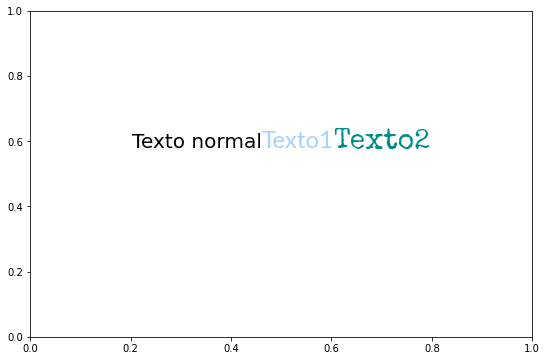

In [11]:
s1 = Style(size=20)
s2 = Style(color="dodgerblue", size=24, alpha=0.4, name="Lato")
s3 = Style(color="darkcyan", size=28, name="Special Elite")

ft = FlexiText(s1("Texto normal"), s2("Texto1"), s3("Texto2"))

fig, ax = plt.subplots(figsize=(9, 6))

ft.plot(0.5, 0.6, ax=ax);

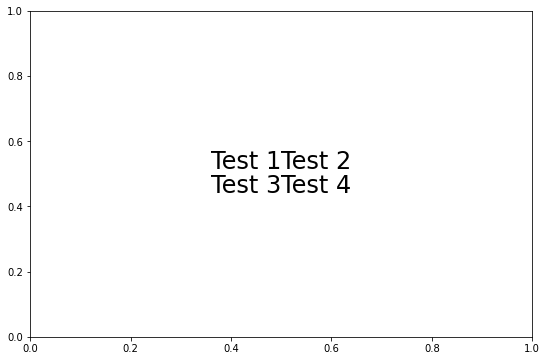

In [12]:
fig, ax = plt.subplots(figsize=(9, 6))


ob1 = HPacker(
    children=[
        TextArea("Test 1", textprops={"size": 24}), 
        TextArea("Test 2", textprops={"size": 24}),
    ], 
    pad=0, 
    sep=0
)

ob2 = HPacker(
    children=[
        TextArea("Test 3", textprops={"size": 24}), 
        TextArea("Test 4", textprops={"size": 24}),
    ], 
    pad=0, 
    sep=0
)


ab = AnnotationBbox(
    VPacker(children=[ob1, ob2], pad=0, sep=0), 
    (0.5, 0.5), 
    xycoords="data", 
    frameon=False, 
    box_alignment=(0.5, 0.5)
)

ax.add_artist(ab)
#ax.text(0.5, 0.8, "Test 1Test 2", size=24)